__Question 1:__ 

We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

Task:

    1.fitting it to the periodic function
    2.plot the fit

Data

    Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
    Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

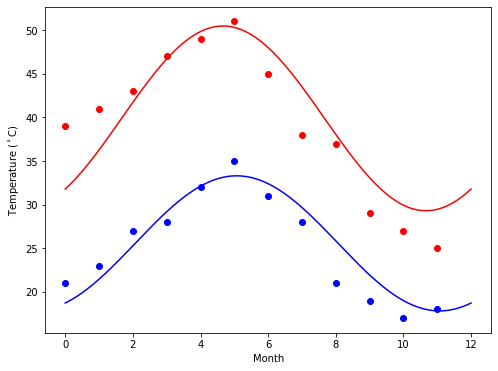

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# data
months = np.arange(12)
max_temp_val = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp_val = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

# function for smooth curve
def yearly_temps(times, avg, ampl, time_offset):
    final_res = avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max())
    return final_res

res_max, cov_max = optimize.curve_fit(yearly_temps, months, max_temp_val, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, min_temp_val, [-40, 20, 0])

# curve space duration
days = np.linspace(0, 12, num=365)

# plotting the constraints
plt.figure(figsize=(8,6))
plt.plot(months, max_temp_val, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_temp_val, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

This assignment is for visualization using matplotlib:
data to use:

url = https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:
    
      1. Create a pie chart presenting the male/female proportion
      2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [6]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


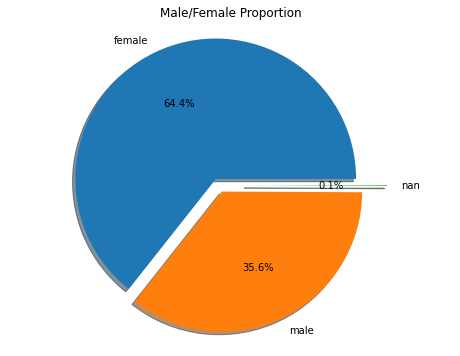

In [7]:
# Statement 1: Create a pie chart presenting the male/female proportion
gender = titanic['sex'].astype('category')
gender = gender.cat.codes

plt.figure(figsize=(8,6))
explode = (0.05, 0.05, 0.2)
plt.pie(gender.value_counts(), labels = titanic['sex'].unique(), autopct='%1.1f%%', pctdistance=0.6, shadow=True, labeldistance=1.1, explode=explode)
plt.title('Male/Female Proportion')
plt.axis('equal')
plt.show()

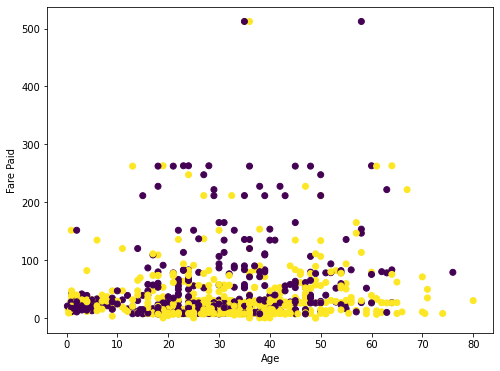

In [8]:
# Statement 1: Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
plt.figure(figsize=(8,6))
plt.scatter(titanic['age'], titanic['fare'], c = gender)
plt.xlabel("Age")
plt.ylabel("Fare Paid")
plt.show()